In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import scipy.signal as sig

In [2]:
output_path = r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_double_support_code\test_hip_heel_dist'
csv_file_name = 'test_hip_heel_events.csv'
png_file_name = 'test_hip_heel_events.png'

In [3]:
mp_path = r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_bw_zeno_outputs_004\subset_for_memory_a\BW-0006\2022_09_26\000_raw_pose_data\gait_vertical_PWS_1_mediapipe.csv'

In [4]:
mp_df = pd.read_csv(mp_path, index_col = 0)
mp_df['Y_neg'] = -mp_df['Y']
mp_df.head()

,X,Y,Z,vis,pres,frame,label,Y_neg
0,inf,inf,inf,inf,inf,0,NaN,-inf
0,inf,inf,inf,inf,inf,1,NaN,-inf
0,inf,inf,inf,inf,inf,2,NaN,-inf
0,inf,inf,inf,inf,inf,3,NaN,-inf
0,inf,inf,inf,inf,inf,4,NaN,-inf


### ankle y position 

In [5]:
# smooth Y ankle data  
mp_r_ank_df = mp_df.loc[mp_df['label'] == 'right_ankle']
mp_r_ank_df = mp_r_ank_df.copy()
mp_r_ank_df['Y_smooth'] = mp_r_ank_df['Y'].rolling(window=5, min_periods=1).mean()
mp_r_ank_df['Y_neg_smooth'] = mp_r_ank_df['Y_neg'].rolling(window=5, min_periods=1).mean()


mp_l_ank_df = mp_df.loc[mp_df['label'] == 'left_ankle']
mp_l_ank_df = mp_l_ank_df.copy()
mp_l_ank_df['Y_smooth'] = mp_l_ank_df['Y'].rolling(window=5, min_periods=1).mean()
mp_l_ank_df['Y_neg_smooth'] = mp_l_ank_df['Y_neg'].rolling(window=5, min_periods=1).mean()

In [6]:
mp_r_ank_df.head()

,X,Y,Z,vis,pres,frame,label,Y_neg,Y_smooth,Y_neg_smooth
28,0.154095,0.266982,0.000739,0.898375,0.0,35,right_ankle,-0.266982,0.266982,-0.266982
28,0.149223,0.120819,-0.219706,0.846681,0.0,49,right_ankle,-0.120819,0.193901,-0.193901
28,0.120130,0.129511,-0.164066,0.780410,0.0,50,right_ankle,-0.129511,0.172438,-0.172438
28,0.117769,0.123230,-0.175364,0.710956,0.0,51,right_ankle,-0.123230,0.160136,-0.160136
28,0.252757,-0.023782,0.272124,0.657669,0.0,89,right_ankle,0.023782,0.123352,-0.123352


In [7]:
mp_l_ank_df.head()

,X,Y,Z,vis,pres,frame,label,Y_neg,Y_smooth,Y_neg_smooth
27,0.153279,0.267693,0.022757,0.904388,0.0,35,left_ankle,-0.267693,0.267693,-0.267693
27,0.145562,0.130964,-0.034763,0.821772,0.0,49,left_ankle,-0.130964,0.199329,-0.199329
27,0.145940,0.131753,-0.010585,0.747686,0.0,50,left_ankle,-0.131753,0.176803,-0.176803
27,0.116321,0.122162,-0.067773,0.676407,0.0,51,left_ankle,-0.122162,0.163143,-0.163143
27,0.262838,-0.009243,0.485038,0.611170,0.0,89,left_ankle,0.009243,0.128666,-0.128666


In [8]:
# find peaks - peaks of raw Y data - valley of true ankle position 
# raw data is kind of flipped 
r_y_valley_i, _ = sig.find_peaks(-mp_r_ank_df['Y_neg_smooth'], distance = 5)
l_y_valley_i, _ = sig.find_peaks(-mp_l_ank_df['Y_neg_smooth'], distance = 5)

In [9]:
# make peak dfs 
r_y_valley_df = pd.DataFrame(data = {'frame' : mp_r_ank_df.iloc[r_y_valley_i]['frame'],
                                    'peak_y_smooth_val' : mp_r_ank_df.iloc[r_y_valley_i]['Y_neg_smooth']
                                    })

l_y_valley_df = pd.DataFrame(data = {'frame' : mp_l_ank_df.iloc[l_y_valley_i]['frame'],
                                    'peak_y_smooth_val' : mp_l_ank_df.iloc[l_y_valley_i]['Y_neg_smooth']
                                    })

(-1.0, 0.0)

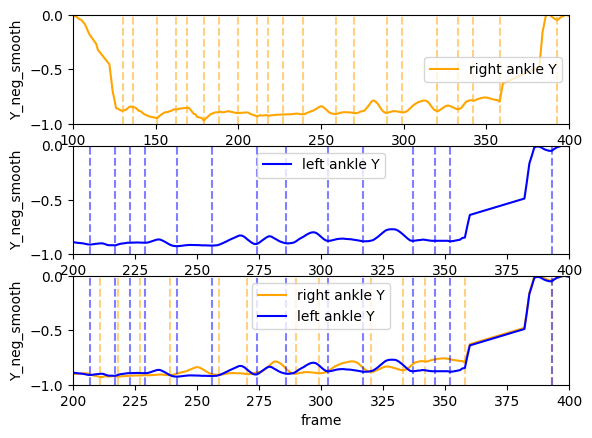

In [10]:
fig, axs = plt.subplots(3)

sns.lineplot(x = 'frame', y = 'Y_neg_smooth', data = mp_r_ank_df, color = 'orange', label = 'right ankle Y', ax = axs[0]) 
sns.lineplot(x = 'frame', y = 'Y_neg_smooth', data = mp_r_ank_df, color = 'orange', label = 'right ankle Y', ax = axs[2])
for r_valley_frame in r_y_valley_df['frame']:
    axs[0].axvline(r_valley_frame, color = 'orange', linestyle = '--', alpha = 0.5)
    axs[2].axvline(r_valley_frame, color = 'orange', linestyle = '--', alpha = 0.5)

sns.lineplot(x = 'frame', y = 'Y_neg_smooth', data = mp_l_ank_df, color = 'blue', label = 'left ankle Y', ax = axs[1]) 
sns.lineplot(x = 'frame', y = 'Y_neg_smooth', data = mp_l_ank_df, color = 'blue', label = 'left ankle Y', ax = axs[2]) 
for l_valley_frame in l_y_valley_df['frame']: 
    axs[1].axvline(l_valley_frame, color = 'blue', linestyle = '--', alpha = 0.5) 
    axs[2].axvline(l_valley_frame, color = 'blue', linestyle = '--', alpha = 0.5)


axs[0].set_xlim([100, 400])
axs[1].set_xlim([200, 400])
axs[2].set_xlim([200, 400])

axs[0].set_ylim([-1, 0])
axs[1].set_ylim([-1, 0])
axs[2].set_ylim([-1, 0])

### hip distance 

In [11]:
# ankle hip to heel difference 
mp_r_hip_df = mp_df.loc[mp_df['label'] == 'right_hip']
mp_r_hip_df = mp_r_hip_df.copy()
mp_r_hip_df['Y_smooth'] = mp_r_hip_df['Y'].rolling(window=5, min_periods=1).mean()
mp_r_hip_df.set_index('frame', inplace=True)

mp_l_hip_df = mp_df.loc[mp_df['label'] == 'left_hip']
mp_l_hip_df = mp_l_hip_df.copy()
mp_l_hip_df['Y_smooth'] = mp_l_hip_df['Y'].rolling(window=5, min_periods=1).mean()
mp_l_hip_df.set_index('frame', inplace=True)

mp_r_ank_df.set_index('frame', inplace=True)
mp_l_ank_df.set_index('frame', inplace=True) 



In [12]:
mp_l_ank_df

,X,Y,Z,vis,pres,label,Y_neg,Y_smooth,Y_neg_smooth
frame,,,,,,,,,
35,0.153279,0.267693,0.022757,0.904388,0.0,left_ankle,-0.267693,0.267693,-0.267693
49,0.145562,0.130964,-0.034763,0.821772,0.0,left_ankle,-0.130964,0.199329,-0.199329
50,0.145940,0.131753,-0.010585,0.747686,0.0,left_ankle,-0.131753,0.176803,-0.176803
51,0.116321,0.122162,-0.067773,0.676407,0.0,left_ankle,-0.122162,0.163143,-0.163143
89,0.262838,-0.009243,0.485038,0.611170,0.0,left_ankle,0.009243,0.128666,-0.128666
...,...,...,...,...,...,...,...,...,...
687,0.510885,0.275747,-0.106539,0.561510,0.0,left_ankle,-0.275747,0.756064,-0.756064
697,0.382230,0.010942,-0.096782,0.564894,0.0,left_ankle,-0.010942,0.578696,-0.578696
698,0.502008,0.066105,0.881875,0.519489,0.0,left_ankle,-0.066105,0.414705,-0.414705


In [13]:
r_hip_ank_diff = abs(mp_r_hip_df['Y_smooth'] - mp_r_ank_df['Y_smooth'])
l_hip_ank_diff = abs(mp_l_hip_df['Y_smooth'] - mp_l_ank_df['Y_smooth'])

diff_df = pd.DataFrame({'r_diff' : r_hip_ank_diff, 
                        'l_diff' : l_hip_ank_diff}) 
diff_df = diff_df.reset_index()
diff_df.head()

,frame,r_diff,l_diff
0,35,0.022646,0.017194
1,49,0.085761,0.076034
2,50,0.102266,0.094795
3,51,0.111487,0.105009
4,89,0.111913,0.105715


In [14]:
# ankle hip to heel difference peaks 
r_diff_peaks_i, _ = sig.find_peaks(diff_df['r_diff'], distance = 5)
l_diff_peaks_i, _ = sig.find_peaks(diff_df['l_diff'], distance = 5)

# make into data frame - selecting frame 
r_diff_peaks_df = pd.DataFrame(data = {'frame' : diff_df.iloc[r_diff_peaks_i]['frame'],
                                       'peak_diff_val' : diff_df.iloc[r_diff_peaks_i]['r_diff']
                                       })

l_diff_peaks_df = pd.DataFrame(data = {'frame' : diff_df.iloc[l_diff_peaks_i]['frame'],
                                       'peak_diff_val' : diff_df.iloc[l_diff_peaks_i]['l_diff']
                                       })

(0.0, 0.7)

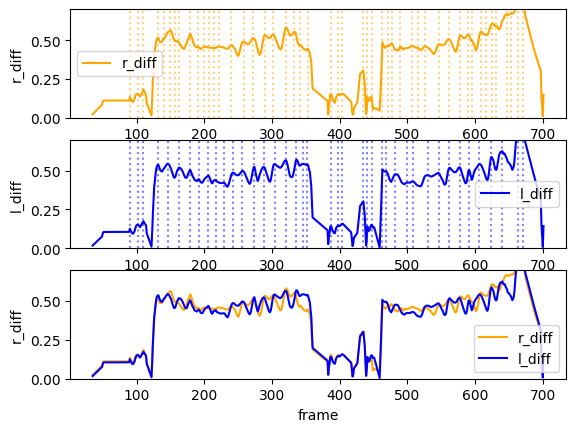

In [15]:
# plot hip to ank diffs and peaks 
fig, axs = plt.subplots(3)
sns.lineplot(x = 'frame', y = 'r_diff', data = diff_df, color = 'orange', label = 'r_diff', ax = axs[0])
sns.lineplot(x = 'frame', y = 'r_diff', data = diff_df, color = 'orange', label = 'r_diff', ax = axs[2])
for r_diff_peak_frame in r_diff_peaks_df['frame']: 
    axs[0].axvline(r_diff_peak_frame, color = 'orange', linestyle = ':', alpha = 0.5) 
    
sns.lineplot(x = 'frame', y = 'l_diff', data = diff_df, color = 'blue', label = 'l_diff', ax = axs[1])
sns.lineplot(x = 'frame', y = 'l_diff', data = diff_df, color = 'blue', label = 'l_diff', ax = axs[2])
for l_diff_peak_frame in l_diff_peaks_df['frame']: 
    axs[1].axvline(l_diff_peak_frame, color = 'blue', linestyle = ':', alpha = 0.5) 
    
plt.legend()
#axs[0].set_xlim([100, 400])
#axs[1].set_xlim([200, 400])
axs[0].set_ylim([0, 0.7])
axs[1].set_ylim([0, 0.7])
axs[2].set_ylim([0, 0.7])

In [16]:
mp_r_ank_df.head()

,X,Y,Z,vis,pres,label,Y_neg,Y_smooth,Y_neg_smooth
frame,,,,,,,,,
35,0.154095,0.266982,0.000739,0.898375,0.0,right_ankle,-0.266982,0.266982,-0.266982
49,0.149223,0.120819,-0.219706,0.846681,0.0,right_ankle,-0.120819,0.193901,-0.193901
50,0.120130,0.129511,-0.164066,0.780410,0.0,right_ankle,-0.129511,0.172438,-0.172438
51,0.117769,0.123230,-0.175364,0.710956,0.0,right_ankle,-0.123230,0.160136,-0.160136
89,0.252757,-0.023782,0.272124,0.657669,0.0,right_ankle,0.023782,0.123352,-0.123352


### Crossing frrames 

In [17]:
#at  what frames right and left mp ankle values cross? 
ankle_y_df = pd.DataFrame(data = {'r_ankle_neg_smooth_y' : mp_r_ank_df['Y_neg_smooth'], 
                                  'l_ankle_neg_smooth_y' : mp_l_ank_df['Y_neg_smooth']})

# mean of 
ankle_y_df['r_l_neg_y_mean'] =  ankle_y_df[['r_ankle_neg_smooth_y', 
                                            'l_ankle_neg_smooth_y']].mean(axis=1)

# Create a new column to identify whether col1 is greater than col2
ankle_y_df['r_greater'] = ankle_y_df['r_ankle_neg_smooth_y'] > ankle_y_df['l_ankle_neg_smooth_y']

# Find the places where the value of r_greater changes
ankle_y_df['change'] = ankle_y_df['r_greater'].ne(ankle_y_df['r_greater'].shift())

# save df with only y crossing frames 
ank_y_cross = ankle_y_df.loc[ankle_y_df['change'] == True]

# reset index so frame is a colun 
ank_y_cross = ank_y_cross.reset_index()
ankle_y_df = ankle_y_df.reset_index() 

# only select ank cross with 
fps = 30
ank_y_cross['sec_diff'] = (ank_y_cross['frame'].diff())/30
# sec_diff = change in y position in next row 
ank_y_cross['sec_diff'] = ank_y_cross['sec_diff'].shift(-1) 
# y cross + tenth of a second 
# why - heel starts to lift and cross slightly before true toe off (I think) 

ank_y_cross['frame_tenth'] = ank_y_cross['frame'] + round(fps * .10)

In [18]:
ankle_y_df.head()

,frame,r_ankle_neg_smooth_y,l_ankle_neg_smooth_y,r_l_neg_y_mean,r_greater,change
0,35,-0.266982,-0.267693,-0.267338,True,True
1,49,-0.193901,-0.199329,-0.196615,True,False
2,50,-0.172438,-0.176803,-0.174620,True,False
3,51,-0.160136,-0.163143,-0.161639,True,False
4,89,-0.123352,-0.128666,-0.126009,True,False


(array([13.,  9.,  9.,  2.,  4.,  1.,  0.,  0.,  0.,  2.]),
 array([0.03333333, 0.24666667, 0.46      , 0.67333333, 0.88666667,
        1.1       , 1.31333333, 1.52666667, 1.74      , 1.95333333,
        2.16666667]),
 <BarContainer object of 10 artists>)

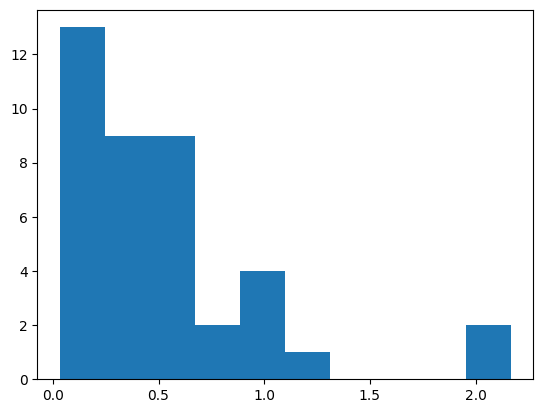

In [19]:
plt.hist(ank_y_cross['sec_diff'])

In [20]:
r_ank_y_cross = ank_y_cross.loc[ank_y_cross['r_greater'] == True]
l_ank_y_cross = ank_y_cross.loc[ank_y_cross['r_greater'] == False]

(-1.0, 0.0)

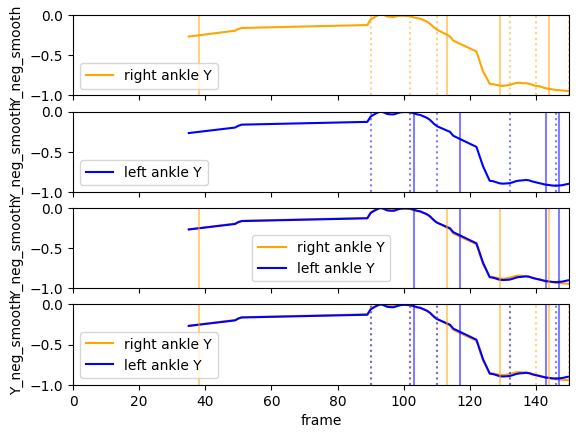

In [21]:
fig, axs = plt.subplots(4, sharex=True, sharey=True)
# right ankle y position 
sns.lineplot(x = 'frame', y = 'Y_neg_smooth', data = mp_r_ank_df, color = 'orange', label = 'right ankle Y', ax = axs[0]) 
sns.lineplot(x = 'frame', y = 'Y_neg_smooth', data = mp_r_ank_df, color = 'orange', label = 'right ankle Y', ax = axs[2])
sns.lineplot(x = 'frame', y = 'Y_neg_smooth', data = mp_r_ank_df, color = 'orange', label = 'right ankle Y', ax = axs[3])
# left ankle y position 
sns.lineplot(x = 'frame', y = 'Y_neg_smooth', data = mp_l_ank_df, color = 'blue', label = 'left ankle Y', ax = axs[1]) 
sns.lineplot(x = 'frame', y = 'Y_neg_smooth', data = mp_l_ank_df, color = 'blue', label = 'left ankle Y', ax = axs[2]) 
sns.lineplot(x = 'frame', y = 'Y_neg_smooth', data = mp_l_ank_df, color = 'blue', label = 'left ankle Y', ax = axs[3]) 
#  crossing of mp ankle y markers - right increasing - toe off?
for r_ank_y_cross_frame in r_ank_y_cross['frame_tenth']:
    axs[0].axvline(r_ank_y_cross_frame, color = 'orange', linestyle = '-', alpha = 0.5)
    axs[2].axvline(r_ank_y_cross_frame, color = 'orange', linestyle = '-', alpha = 0.5)
    axs[3].axvline(r_ank_y_cross_frame, color = 'orange', linestyle = '-', alpha = 0.5)
    
#  crossing of mp ankle y markers - left increasing - toe off?
for l_ank_y_cross_frame in l_ank_y_cross['frame_tenth']:
    axs[1].axvline(l_ank_y_cross_frame, color = 'blue', linestyle = '-', alpha = 0.5)
    axs[2].axvline(l_ank_y_cross_frame, color = 'blue', linestyle = '-', alpha = 0.5)
    axs[3].axvline(l_ank_y_cross_frame, color = 'blue', linestyle = '-', alpha = 0.5)
    
# peak distance of hip to heel right - heel strike?   
for r_diff_peak_frame in r_diff_peaks_df['frame']: 
    axs[0].axvline(r_diff_peak_frame, color = 'orange', linestyle = ':', alpha = 0.5) 
    axs[3].axvline(r_diff_peak_frame, color = 'orange', linestyle = ':', alpha = 0.5)
    
# peak distance of hip to heel left - heel strike?   
for l_diff_peak_frame in l_diff_peaks_df['frame']: 
    axs[1].axvline(l_diff_peak_frame, color = 'blue', linestyle = ':', alpha = 0.5) 
    axs[3].axvline(l_diff_peak_frame, color = 'blue', linestyle = ':', alpha = 0.5) 
    
axs[0].set_xlim([0, 150])
axs[1].set_xlim([0, 150])
axs[2].set_xlim([0, 150])
axs[3].set_xlim([0, 150])

axs[0].set_ylim([-1, 0])
axs[1].set_ylim([-1, 0])
axs[2].set_ylim([-1, 0])
axs[3].set_ylim([-1, 0])

## Try algorithm to extract 

In [22]:
ank_y_cross.head()

,frame,r_ankle_neg_smooth_y,l_ankle_neg_smooth_y,r_l_neg_y_mean,r_greater,change,sec_diff,frame_tenth
0,35,-0.266982,-0.267693,-0.267338,True,True,2.166667,38
1,100,-0.007501,-0.006106,-0.006804,False,True,0.333333,103
2,110,-0.179140,-0.181596,-0.180368,True,True,0.133333,113
3,114,-0.264528,-0.253208,-0.258868,False,True,0.400000,117
4,126,-0.855374,-0.861565,-0.858469,True,True,0.466667,129


In [23]:
r_ank_y_cross.head()

,frame,r_ankle_neg_smooth_y,l_ankle_neg_smooth_y,r_l_neg_y_mean,r_greater,change,sec_diff,frame_tenth
0,35,-0.266982,-0.267693,-0.267338,True,True,2.166667,38
2,110,-0.179140,-0.181596,-0.180368,True,True,0.133333,113
4,126,-0.855374,-0.861565,-0.858469,True,True,0.466667,129
6,141,-0.884801,-0.891592,-0.888197,True,True,0.100000,144
8,160,-0.876767,-0.883948,-0.880358,True,True,0.400000,163


In [24]:
l_ank_y_cross.head()

,frame,r_ankle_neg_smooth_y,l_ankle_neg_smooth_y,r_l_neg_y_mean,r_greater,change,sec_diff,frame_tenth
1,100,-0.007501,-0.006106,-0.006804,False,True,0.333333,103
3,114,-0.264528,-0.253208,-0.258868,False,True,0.400000,117
5,140,-0.881605,-0.881557,-0.881581,False,True,0.033333,143
7,144,-0.917624,-0.915157,-0.916391,False,True,0.533333,147
9,172,-0.888821,-0.884359,-0.886590,False,True,1.033333,175


In [25]:
r_diff_peaks_df.head()

,frame,peak_diff_val
5,90,0.134145
17,102,0.155050
24,110,0.183875
37,132,0.515610
45,140,0.512851


In [26]:
# only calculate for rows with reasonable step time diff (between crosses) 
ank_y_cross = ank_y_cross.loc[(ank_y_cross['sec_diff'] < 1) & (ank_y_cross['sec_diff'] > .1)]

# blank gait events to populate 
all_gait_events = [] 

# iterate through each row of y cross df
for index, row in ank_y_cross.iterrows(): 
    
    # if first event is right foot toe off 
    if row['r_greater'] == True: 
        first_toe_off_foot = 'right'
        to_df_1 = r_ank_y_cross
        hs_df_1 = r_diff_peaks_df
        to_df_2 = l_ank_y_cross
        hs_df_2 = l_diff_peaks_df

    # if first event is left toe off 
    elif row['r_greater'] == False: 
        first_toe_off_foot = 'left'
        to_df_1 = l_ank_y_cross
        hs_df_1 = l_diff_peaks_df
        to_df_2 = r_ank_y_cross
        hs_df_2 = r_diff_peaks_df
    
    # foot 1  toe off 1 = first y cross 
    toe_off_1a = row['frame_tenth']  

    # foot 1 heel strike 1 = frame of first max ank to hip dist of foot 1 
    hs_1a_rows = hs_df_1.loc[hs_df_1['frame'] > toe_off_1a]
    if len(hs_1a_rows) > 0: 
        heel_strike_1a = hs_1a_rows['frame'].iloc[0]
    else:
        heel_strike_1a = None

    # foot 2 toe off 1 = next y cross 
    to_2_rows = to_df_2.loc[to_df_2['frame_tenth'] >= heel_strike_1a]
    if len(to_2_rows) > 0: 
        toe_off_2 = to_2_rows['frame_tenth'].iloc[0]
    else:
        toe_off_2 = None

    # foot 2 heel strike = frame of first max ank to hip dist of foot 2 
    hs_2_rows = hs_df_2.loc[hs_df_2['frame'] > toe_off_2] 
    if len(hs_2_rows) > 0: 
        heel_strike_2 = hs_2_rows['frame'].iloc[0]
    else: 
        heel_strike_2 = None

    # foot 1 toe off # 2 
    to_1b_rows = to_df_1.loc[to_df_1['frame_tenth'] >= heel_strike_2] 
    if len(to_1b_rows) > 0: 
        toe_off_1b = to_1b_rows['frame_tenth'].iloc[0]
    else: 
        toe_off_1b = None 
    
    # foot 1 heel strike #2 
    hs_1b_rows = hs_df_1.loc[hs_df_1['frame'] > toe_off_1b] 
    if len(hs_1b_rows) > 0:
        heel_strike_1b = hs_1b_rows['frame'].iloc[0]
    else: 
        heel_strike_1b = None 
    # combine and 
    current_gait_events = pd.DataFrame(data = {'y_cross_row_index' : [index],
                                               'first_toe_off_foot' : [first_toe_off_foot],
                                               'foot_1_toe_off_a' : [toe_off_1a], 
                                               'foot_1_heel_strike_a' : [heel_strike_1a], 
                                               'foot_2_toe_off' : [toe_off_2],
                                               'foot_2_heel_strike' : [heel_strike_2], 
                                               'foot_1_toe_off_b' : [toe_off_1b], 
                                               'foot_1_heel_strike_b' : [heel_strike_1b]
                                              }) 

    all_gait_events.append(current_gait_events)                 

In [27]:
all_gait_events_df = pd.concat(all_gait_events)
all_gait_events_df = all_gait_events_df.reset_index(drop = True)
all_gait_events_df = all_gait_events_df.dropna()
all_gait_events_df.tail()

,y_cross_row_index,first_toe_off_foot,foot_1_toe_off_a,foot_1_heel_strike_a,foot_2_toe_off,foot_2_heel_strike,foot_1_toe_off_b,foot_1_heel_strike_b
19,32,right,530,547,552,562,565,578
20,33,left,552,562,565,578,581,591
21,34,right,565,578,581,591,601,609
22,35,left,581,591,601,609,611,624
23,36,right,601,609,611,624,638,647


0


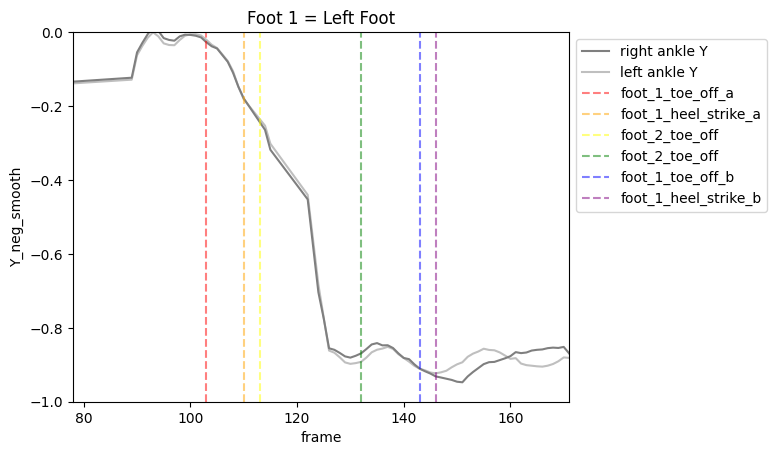

1


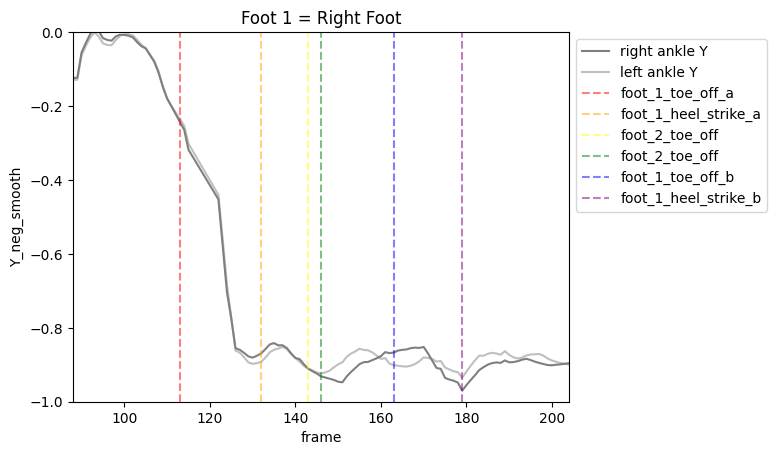

2


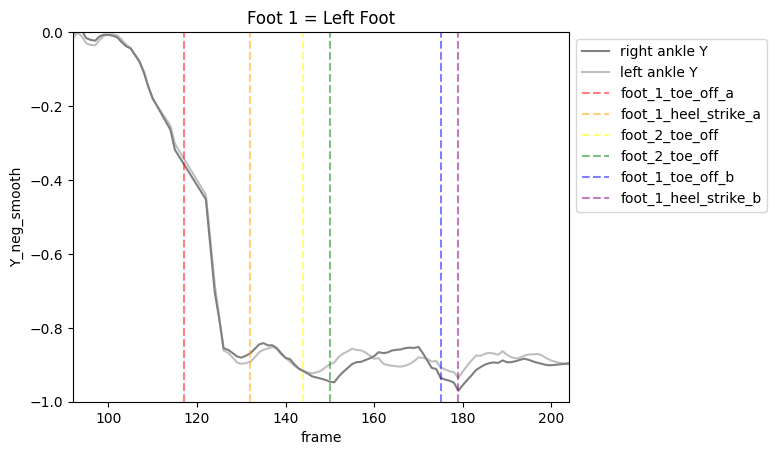

3


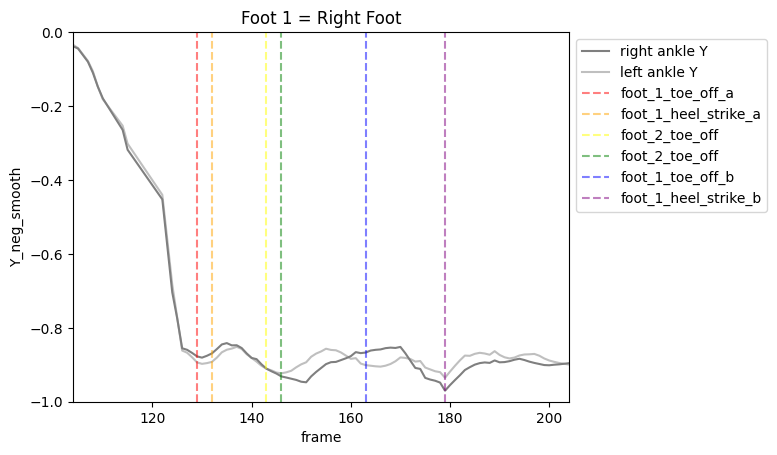

4


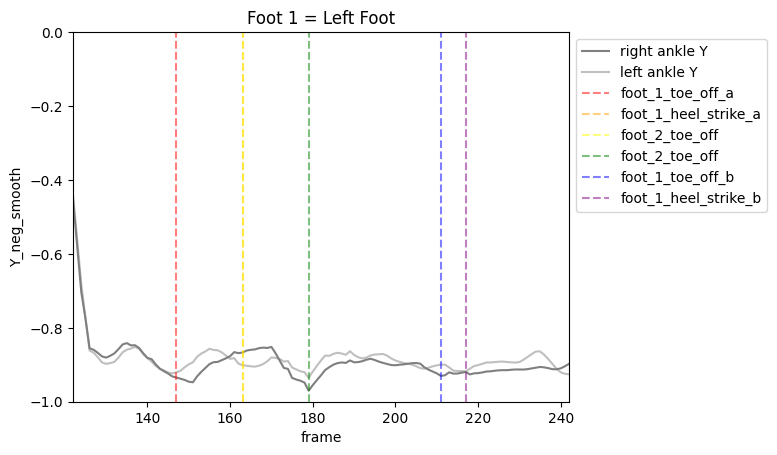

5


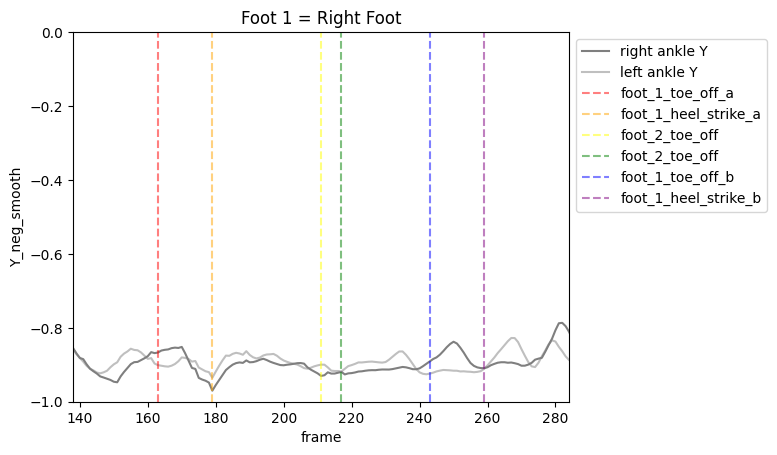

6


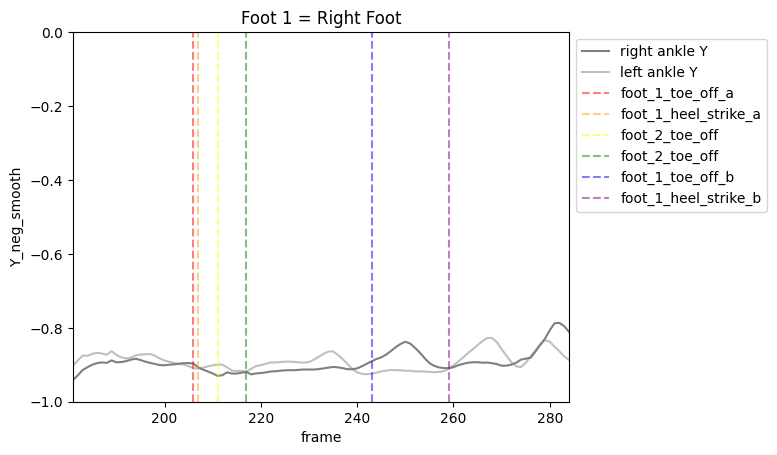

7


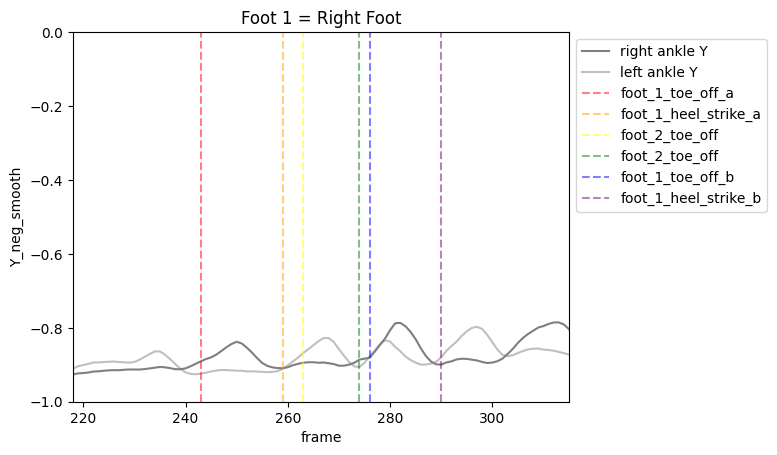

8


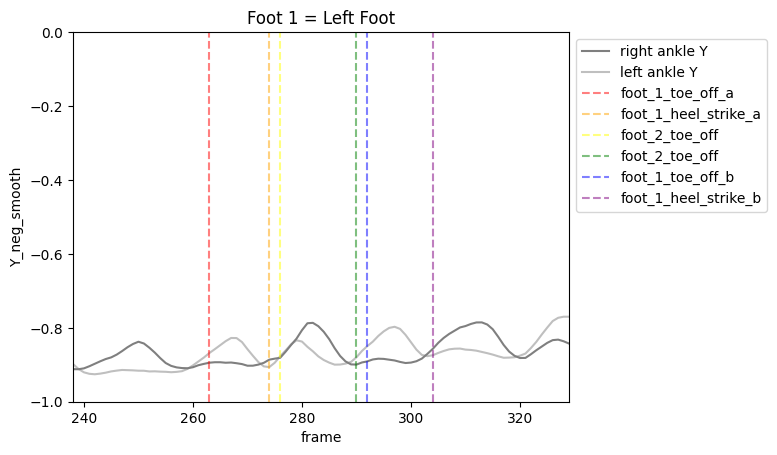

9


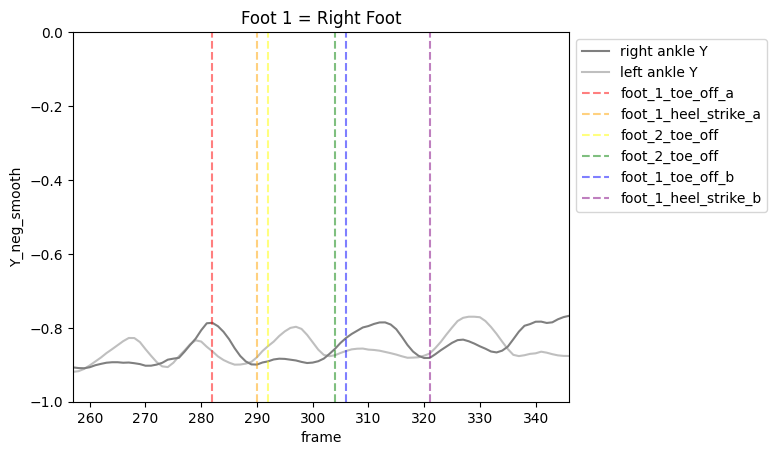

10


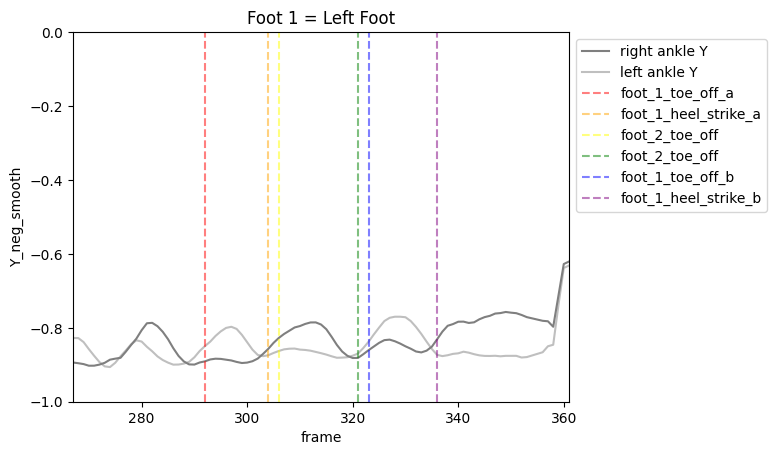

11


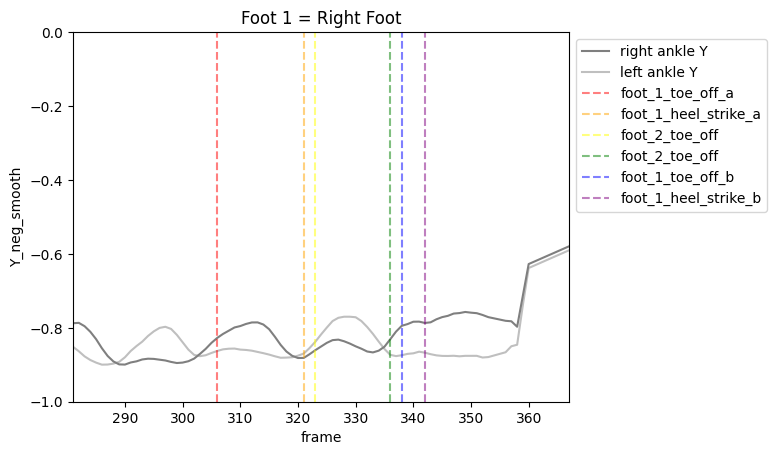

12


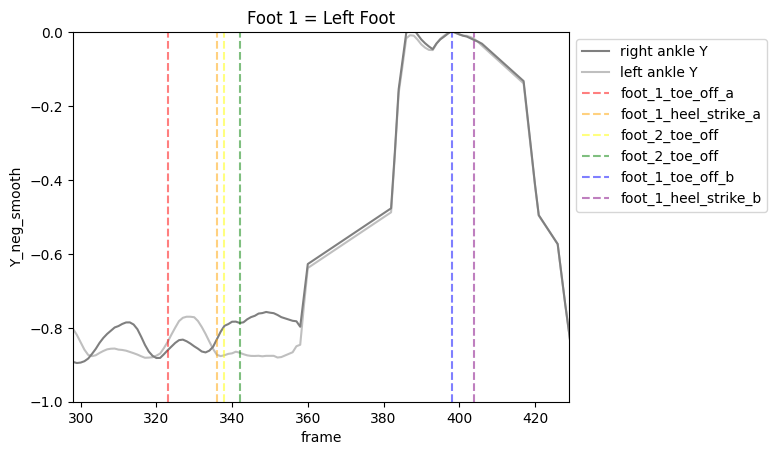

13


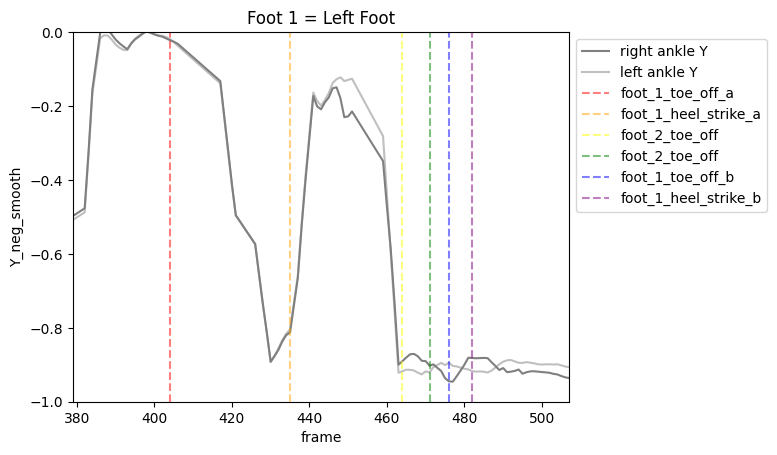

14


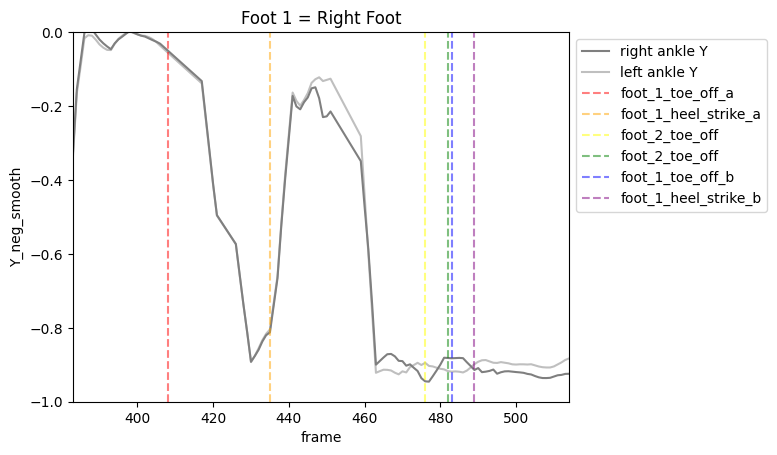

15


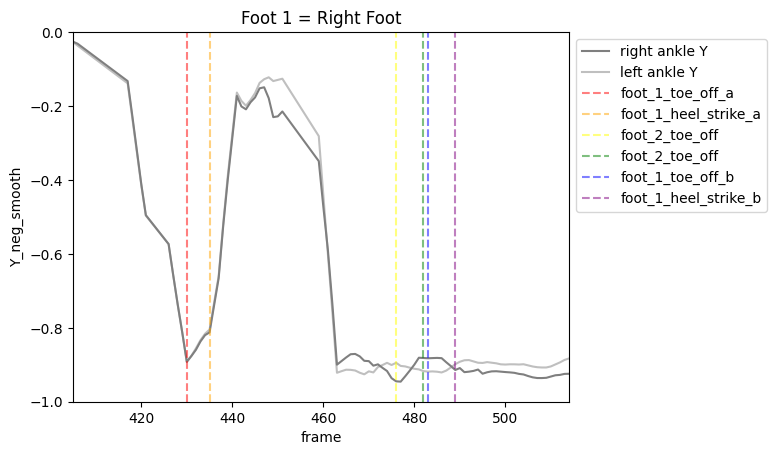

16


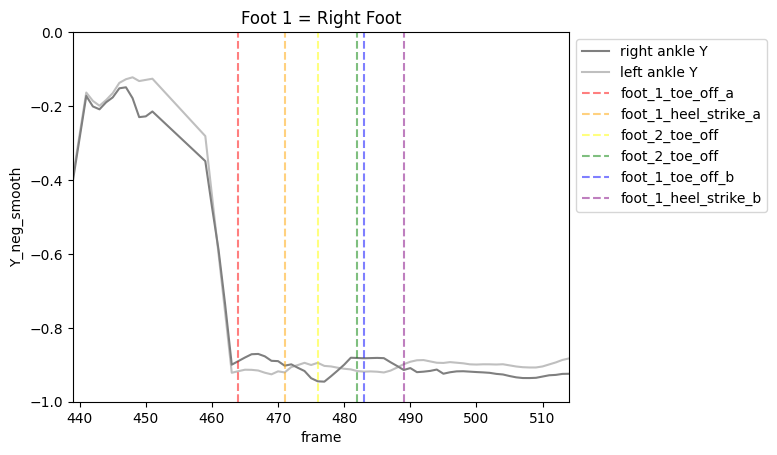

17


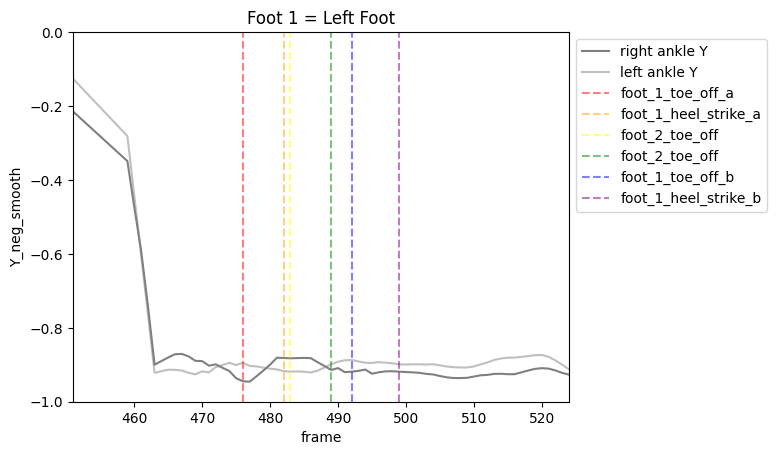

18


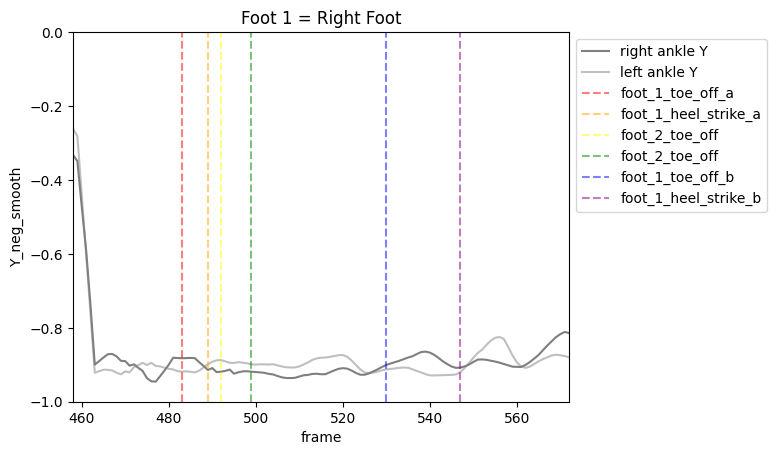

19


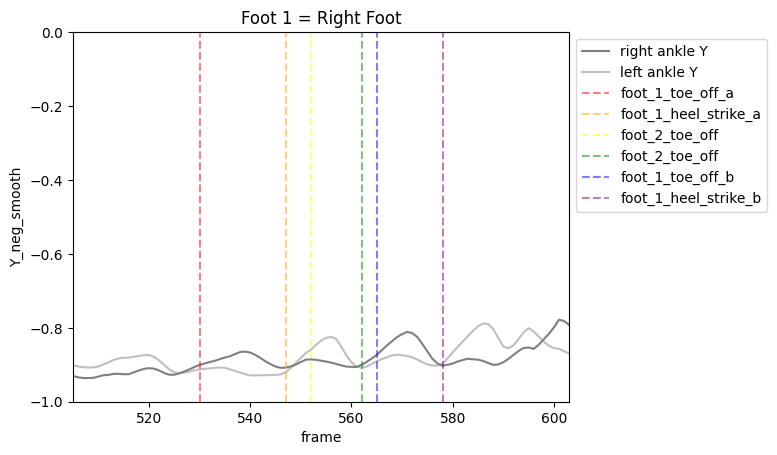

20


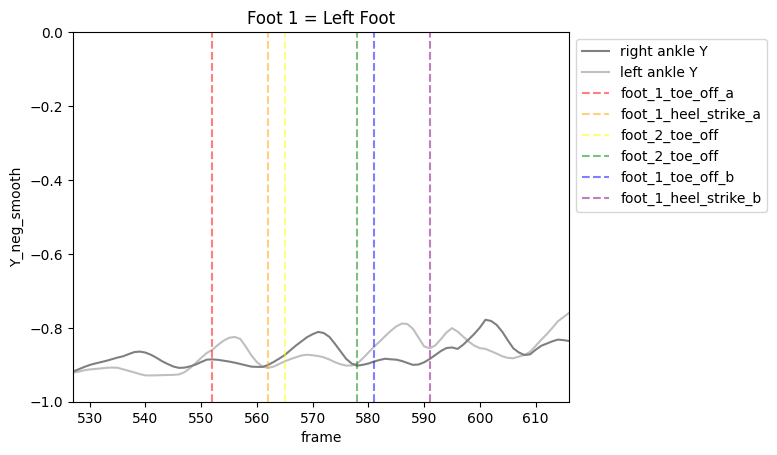

21


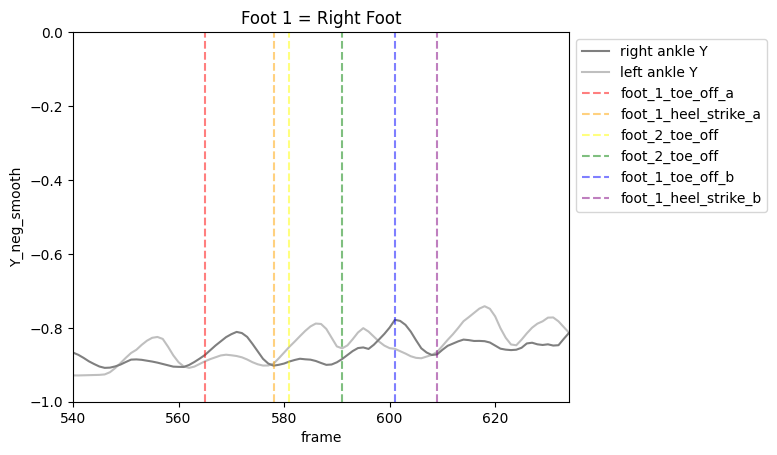

22


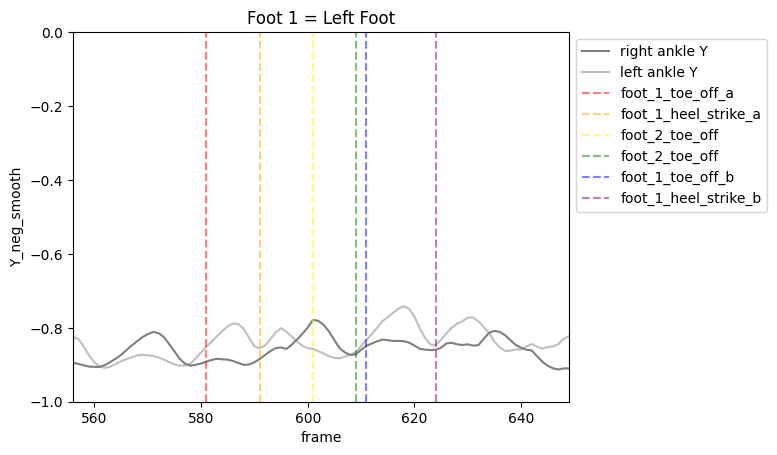

23


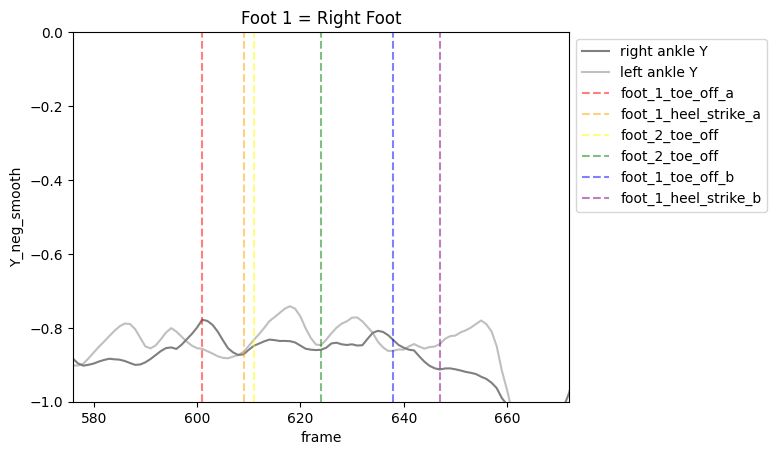

In [28]:
## Plot each set of gait events data 
for index, row in all_gait_events_df.iterrows():
    print(index)
    # right ankle y position 
    sns.lineplot(x = 'frame', y = 'Y_neg_smooth', 
                 data = mp_r_ank_df, 
                 color = 'black', label = 'right ankle Y', alpha = 0.5) 
    # left ankle y position 
    sns.lineplot(x = 'frame', y = 'Y_neg_smooth', 
                 data = mp_l_ank_df, 
                 color = 'grey', label = 'left ankle Y', alpha = 0.5) 
    
    # foot 1 toe off a
    plt.axvline(row['foot_1_toe_off_a'], color = 'red', linestyle = '--', alpha = 0.5, label = 'foot_1_toe_off_a')
    
    # foot 1 heel strike a 
    plt.axvline(row['foot_1_heel_strike_a'], color = 'orange', linestyle = '--', alpha = 0.5, label = 'foot_1_heel_strike_a')
    
    # foot 2 toe off 
    plt.axvline(row['foot_2_toe_off'], color = 'yellow', linestyle = '--', alpha = 0.5, label = 'foot_2_toe_off')

    # foot 2 heel strike 
    plt.axvline(row['foot_2_heel_strike'], color = 'green', linestyle = '--', alpha = 0.5, label = 'foot_2_toe_off')

    # foot 1 toe off b 
    plt.axvline(row['foot_1_toe_off_b'], color = 'blue', linestyle = '--', alpha = 0.5, label = 'foot_1_toe_off_b')

    # foot 1 heel strike 2 
    plt.axvline(row['foot_1_heel_strike_b'], color = 'purple', linestyle = '--', alpha = 0.5, label = 'foot_1_heel_strike_b')

    # title = foot 1 
    if row['first_toe_off_foot'] == 'left':
        plt.title("Foot 1 = Left Foot") 
    elif row['first_toe_off_foot'] == 'right':
        plt.title("Foot 1 = Right Foot")

    plt.ylim([-1, 0])
    plt.xlim([row['foot_1_toe_off_a'] - 25, row['foot_1_heel_strike_b'] + 25]) 
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    plt.close() 

In [29]:
all_gait_events_df.head()

,y_cross_row_index,first_toe_off_foot,foot_1_toe_off_a,foot_1_heel_strike_a,foot_2_toe_off,foot_2_heel_strike,foot_1_toe_off_b,foot_1_heel_strike_b
0,1,left,103,110,113,132,143,146
1,2,right,113,132,143,146,163,179
2,3,left,117,132,144,150,175,179
3,4,right,129,132,143,146,163,179
4,7,left,147,163,163,179,211,217


In [30]:
# frame diff columns 
all_gait_events_df['frameDiff_to1a_hs1a'] = all_gait_events_df['foot_1_heel_strike_a'] - all_gait_events_df['foot_1_toe_off_a']
all_gait_events_df['frameDiff_hs1a_to2'] = all_gait_events_df['foot_2_toe_off'] - all_gait_events_df['foot_1_heel_strike_a']
all_gait_events_df['frameDiff_to2_hs2'] = all_gait_events_df['foot_2_heel_strike'] - all_gait_events_df['foot_2_toe_off']
all_gait_events_df['frameDiff_hs2_to1b'] = all_gait_events_df['foot_1_toe_off_b'] - all_gait_events_df['foot_2_heel_strike']
all_gait_events_df['frameDiff_to1b_hs1b'] = all_gait_events_df['foot_1_heel_strike_b'] - all_gait_events_df['foot_1_toe_off_b']


In [31]:
# gait cycle time = first contact of one foot the the following first contact of the same foot 
all_gait_events_df['gait_cycle_time_sec'] = (all_gait_events_df['foot_1_heel_strike_b'] - all_gait_events_df['foot_1_heel_strike_a']) / fps

In [32]:
# stance time = time foot 1 is in contact with the ground 
all_gait_events_df['stance_time_sec'] = (all_gait_events_df['foot_1_toe_off_b'] - all_gait_events_df['foot_1_heel_strike_a']) / 30 
all_gait_events_df['stance_time_per'] = (all_gait_events_df['stance_time_sec'] / all_gait_events_df['gait_cycle_time_sec']) * 100


In [33]:
# swing time - period of time foot 1 is not in contact with the ground 
all_gait_events_df['swing_time_sec'] = all_gait_events_df['gait_cycle_time_sec'] - all_gait_events_df['stance_time_sec']
all_gait_events_df['swing_time_per'] = (all_gait_events_df['swing_time_sec'] / all_gait_events_df['gait_cycle_time_sec']) * 100

In [34]:
# single support time 
# period of time when only the current foot is in contact with the ground 
all_gait_events_df['singlesupport_time_sec'] = (all_gait_events_df['foot_2_heel_strike'] - all_gait_events_df['foot_2_toe_off']) / fps
all_gait_events_df['singlesupport_per'] = (all_gait_events_df['singlesupport_time_sec'] / all_gait_events_df['gait_cycle_time_sec']) * 100


In [35]:
# double support time 
all_gait_events_df['ini_dsupport_sec'] = (all_gait_events_df['foot_2_toe_off'] - all_gait_events_df['foot_1_heel_strike_a']) / fps
all_gait_events_df['term_dsupport_sec'] = (all_gait_events_df['foot_1_toe_off_b'] - all_gait_events_df['foot_2_heel_strike']) / fps
all_gait_events_df['tot_dsupport_time_sec'] = all_gait_events_df['ini_dsupport_sec'] + all_gait_events_df['term_dsupport_sec'] 
all_gait_events_df['tot_dsupport_per'] = (all_gait_events_df['tot_dsupport_time_sec'] / all_gait_events_df['gait_cycle_time_sec']) * 100




,y_cross_row_index,first_toe_off_foot,foot_1_toe_off_a,foot_1_heel_strike_a,foot_2_toe_off,foot_2_heel_strike,foot_1_toe_off_b,foot_1_heel_strike_b,frameDiff_to1a_hs1a,frameDiff_hs1a_to2,...,stance_time_sec,stance_time_per,swing_time_sec,swing_time_per,singlesupport_time_sec,singlesupport_per,ini_dsupport_sec,term_dsupport_sec,tot_dsupport_time_sec,tot_dsupport_per
0,1,left,103,110,113,132,143,146,7,3,...,1.10,91.67,0.10,8.33,0.63,52.78,0.10,0.37,0.47,38.89
3,4,right,129,132,143,146,163,179,3,11,...,1.03,65.96,0.53,34.04,0.10,6.38,0.37,0.57,0.93,59.57
7,12,right,243,259,263,274,276,290,16,4,...,0.57,54.84,0.47,45.16,0.37,35.48,0.13,0.07,0.20,19.35
8,13,left,263,274,276,290,292,304,11,2,...,0.60,60.00,0.40,40.00,0.47,46.67,0.07,0.07,0.13,13.33
9,16,right,282,290,292,304,306,321,8,2,...,0.53,51.61,0.50,48.39,0.40,38.71,0.07,0.07,0.13,12.90
10,17,left,292,304,306,321,323,336,12,2,...,0.63,59.38,0.43,40.62,0.50,46.88,0.07,0.07,0.13,12.50
13,23,left,404,435,464,471,476,482,31,29,...,1.37,87.23,0.20,12.77,0.23,14.89,0.97,0.17,1.13,72.34
14,24,right,408,435,476,482,483,489,27,41,...,1.60,88.89,0.20,11.11,0.20,11.11,1.37,0.03,1.40,77.78
15,26,right,430,435,476,482,483,489,5,41,...,1.60,88.89,0.20,11.11,0.20,11.11,1.37,0.03,1.40,77.78
16,28,right,464,471,476,482,483,489,7,5,...,0.40,66.67,0.20,33.33,0.20,33.33,0.17,0.03,0.20,33.33


In [47]:
# round and save 
temp_foot = all_gait_events_df['first_toe_off_foot'] 
all_gait_events_df = all_gait_events_df.apply(pd.to_numeric, errors='coerce')
all_gait_events_df = all_gait_events_df.round(2)
all_gait_events_df['first_toe_off_foot'] = temp_foot 

In [48]:
 all_gait_events_df.to_csv(os.path.join(output_path, 'all_gait_events_df.csv'))

(array([1., 0., 0., 7., 1., 0., 0., 0., 2., 2.]),
 array([0.6 , 0.72, 0.84, 0.96, 1.08, 1.2 , 1.32, 1.44, 1.56, 1.68, 1.8 ]),
 <BarContainer object of 10 artists>)

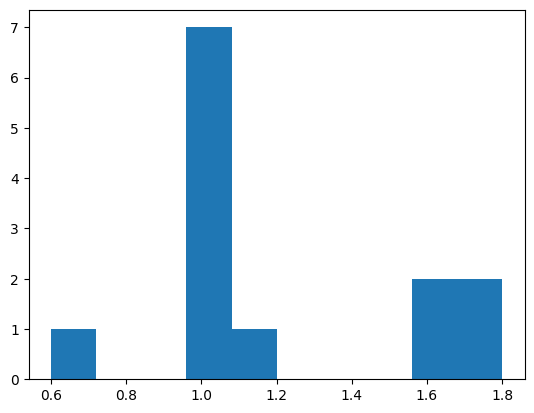

In [49]:
plt.hist(all_gait_events_df['gait_cycle_time_sec'])

(array([1., 3., 0., 0., 0., 3., 2., 0., 3., 1.]),
 array([ 6.38, 11.02, 15.66, 20.3 , 24.94, 29.58, 34.22, 38.86, 43.5 ,
        48.14, 52.78]),
 <BarContainer object of 10 artists>)

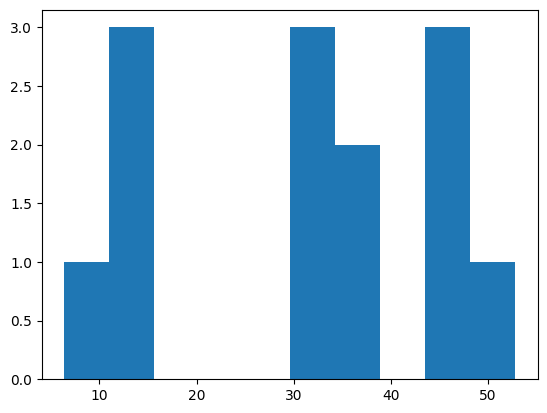

In [50]:
plt.hist(all_gait_events_df['singlesupport_per'])


(array([3., 2., 1., 1., 2., 0., 0., 1., 0., 3.]),
 array([12.5  , 19.028, 25.556, 32.084, 38.612, 45.14 , 51.668, 58.196,
        64.724, 71.252, 77.78 ]),
 <BarContainer object of 10 artists>)

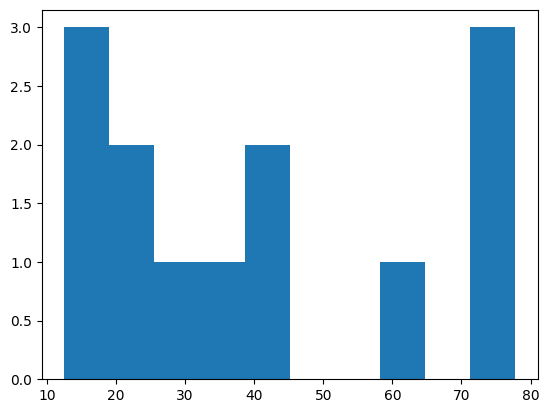

In [51]:
plt.hist(all_gait_events_df['tot_dsupport_per'])

## Test filtering to improve accuracy 

In [41]:
all_gait_events_df_2 = all_gait_events_df.loc[all_gait_events_df['gait_cycle_time_sec'] < 2]
len(all_gait_events_df_2)
all_gait_events_df_2['tot_dsupport_per'].mean()

42.778181818181814

In [42]:
# filter ?? During reciprocal gait, the Single Support Time of the current foot is the same as the Swing Time of the previous opposite foot, 
# filter rows out where single support tmie is way diff then previoius swing time 

# During reciprocal gait, the Single Support Time of the current foot is 
# the same as the Swing Time of the previous opposite foot, 
# filter rows out where single support tmie is way diff then previoius swing time 

support_shift1 = all_gait_events_df['singlesupport_time_sec'].shift(-1) 
all_gait_events_df = all_gait_events_df.loc[all_gait_events_df['swing_time_sec'] == all_gait_events_df['singlesupport_time_sec'].shift(-1)] 
